In [9]:
!pip install torch==1.13.1+cu118 torchvision==0.14.1+cu118 torchaudio==0.13.1+cu118 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr


Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.13.1+cu118 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2

In [60]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [126]:
IMAGE_PATH="download.png"

In [127]:
reader=easyocr.Reader(['en'],gpu=False)
result=reader.readtext(IMAGE_PATH)
result

[([[70, 90], [208, 90], [208, 122], [70, 122]],
  'SAVE WATER',
  0.9969033327696557),
 ([[87, 119], [193, 119], [193, 137], [87, 137]],
  "Don't Waste it",
  0.8741677277021875)]

In [128]:
text=""
for detection in result:
  text=text+detection[1]+" "
text

"SAVE WATER Don't Waste it "

In [129]:
def convert_to_lowercase(sentence):
    words = sentence.split()
    first_word = words[0]
    rest_of_words = words[1:]
    converted_words = [first_word[0].upper() + first_word[1:].lower()] + [word.lower() for word in rest_of_words]
    return ' '.join(converted_words)

In [130]:
text=convert_to_lowercase(text)

In [14]:
!pip install transformers ipywidgets gradio --upgrade

In [15]:
import gradio as gr
from transformers import pipeline

In [52]:
model_checkpoint = "t5-base"
revision = "main"
translation_pipeline = pipeline('translation_en_to_de', model=model_checkpoint, revision=revision)

In [131]:
final_text=translation_pipeline(text)
final_text[0]['translation_text']

'Wasser sparen, es nicht verschwenden'

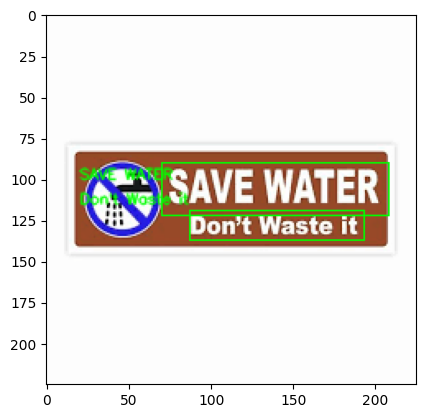

In [132]:
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),1)
    img = cv2.putText(img,text,(20,spacer), font, 0.3,(0,255,0),1,cv2.LINE_AA)
    spacer+=15

plt.imshow(img)
plt.show()